In [1]:
from components.models import Model

c:\Users\a.almasri\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
m = Model(model_name="all-MiniLM-L6-v2")

In [3]:
m.embed(sentences=["Hello world"])

TypeError: BertModel.forward() got an unexpected keyword argument 'padding'

In [8]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


# Sentences we want sentence embeddings for
# sentences = ['This is an example sentence', 'Each sentence is converted']
sentences = ["Hello world"]
# Load model from HuggingFace Hub
tokenizer = AutoTokenizer.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')
model = AutoModel.from_pretrained('sentence-transformers/all-MiniLM-L6-v2')




In [9]:
from typing import List


In [10]:
def encode(sentences: List[str] = None, normalzied: bool = True) -> torch.Tensor:

    if sentences is not None:
            
        # Tokenize sentences
        encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

        # Compute token embeddings
        with torch.no_grad():
            model_output = model(**encoded_input)

        # Perform pooling
        sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

        if normalzied:
            # Normalize embeddings
            sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

        return sentence_embeddings

In [11]:
print(encode(["Hello world"]))

tensor([[-3.4477e-02,  3.1023e-02,  6.7349e-03,  2.6109e-02, -3.9362e-02,
         -1.6030e-01,  6.6924e-02, -6.4415e-03, -4.7451e-02,  1.4759e-02,
          7.0875e-02,  5.5528e-02,  1.9193e-02, -2.6251e-02, -1.0110e-02,
         -2.6941e-02,  2.2308e-02, -2.2227e-02, -1.4969e-01, -1.7493e-02,
          7.6763e-03,  5.4352e-02,  3.2544e-03,  3.1726e-02, -8.4621e-02,
         -2.9406e-02,  5.1596e-02,  4.8124e-02, -3.3148e-03, -5.8279e-02,
          4.1969e-02,  2.2211e-02,  1.2819e-01, -2.2339e-02, -1.1656e-02,
          6.2928e-02, -3.2876e-02, -9.1226e-02, -3.1175e-02,  5.2700e-02,
          4.7035e-02, -8.4203e-02, -3.0056e-02, -2.0745e-02,  9.5178e-03,
         -3.7218e-03,  7.3434e-03,  3.9324e-02,  9.3274e-02, -3.7887e-03,
         -5.2742e-02, -5.8058e-02, -6.8644e-03,  5.2832e-03,  8.2893e-02,
          1.9363e-02,  6.2845e-03, -1.0331e-02,  9.0324e-03, -3.7684e-02,
         -4.5206e-02,  2.4016e-02, -6.9442e-03,  1.3492e-02,  1.0006e-01,
         -7.1684e-02, -2.1695e-02,  3.

In [5]:
from transformers import AutoTokenizer, AutoModel
import torch
import torch.nn.functional as F
from typing import List
from utils import mean_pooling


#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)


class EmbeddingModel:
    """
    A class to wrap the embedding model to be used

    Attributes:

    """

    allowed_models = ["all-mpnet-base-v2",
                      "all-MiniLM-L6-v2"]

    def __init__(self, model_name: str = "all-mpnet-base-v2") -> None:
        """ 
        """
        if model_name in self.allowed_models:
            # Load model from HuggingFace Hub
            self.model = AutoTokenizer.from_pretrained(
                "sentence-transformers/all-MiniLM-L6-v2"
            )
            self.tokenizer = AutoModel.from_pretrained(
                "sentence-transformers/all-MiniLM-L6-v2"
            )
        else:
            raise Exception("Model not supported!")

    def emb(self, sentences: List[str] = None, normalzied: bool = True) -> torch.Tensor:
        """
        """
        if sentences is not None:
            # Tokenize sentences
            encoded_input = self.tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

            # Compute token embeddings
            with torch.no_grad():
                model_output = self.model(**encoded_input)

            # Perform pooling
            sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])

            if normalzied:
                # Normalize embeddings
                sentence_embeddings = F.normalize(sentence_embeddings, p=2, dim=1)

            return sentence_embeddings           

### Session Class

In [1]:
from components.models import EmbeddingModel
from session import QuerySession


In [2]:
from components.models import EmbeddingModel
queries = ["Hello my friend", "Hi buddy", "Hello mate", "Hi friend"]
EmbeddingModel = EmbeddingModel("all-mpnet-base-v2")
session1 = QuerySession(queries, EmbeddingModel)

In [3]:
EmbeddingModel = EmbeddingModel("all-mpnet-base-v2")

In [4]:
session1 = QuerySession(queries, EmbeddingModel)

TypeError: 'NoneType' object is not iterable

In [4]:
from typing import List, Union
import numpy as np
from utils import compute_statistic
import pandas as pd


class QuerySession:
    """ """

    def __init__(
        self,
        queries: List[str] = None,
        normalize_embeddings: bool = False,
        embedding_model: str = None,
        context_window_size: int = 1,
        statistic: str = "mean",
    ) -> None:
        """ """
        if queries is not None:
            self.queries: List[str] = queries[:]
            self.session_size = len(queries)
            self.embedding_model = embedding_model
            self.normalized_session = normalize_embeddings
            self.embeddings = self._embed_queries(
                queries=queries,
                embedding_model=self.embedding_model,
                normalize_embeddings=self.normalized_session,
            )
            self.global_coherence_score, self.local_coherence_scores = (
                self.compute_global_coherence(context_window=context_window_size, statistic=statistic)
            )
            self.statistic = statistic
            self.context_window_size = context_window_size

    def _embed_queries(
        self,
        queries: List[str],
        embedding_model: str = None,
        normalize_embeddings: bool = False,
    ) -> np.ndarray:
        """ """
        if embedding_model is not None:
            return embedding_model.embed(
                sentences=queries, normalize_embeddings=normalize_embeddings
            )

    def add_query(self, query) -> None:
        """ """
        self.queries.append(query)
        self.session_size += 1
        query_embedding = self.embedding_model.embed(
            sentences=[query], normalize_embeddings=self.normalized_session
        )
        self.embeddings = np.concatenate([self.embeddings, query_embedding])
        context_vector = self._compute_context_vector(
            position=self.session_size - 1, context_window=self.context_window_size
        )
        local_coherence_score = self._compute_local_coherence(
            current_vector=query_embedding[0], neighbor_vector=context_vector
        )

        self.local_coherence_scores.append(local_coherence_score)

        self.global_coherence_score = compute_statistic(
            numbers=self.local_coherence_scores, statistic=self.statistic
        )

    def add_queries(self, queries: Union[str, List[str]]) -> None:
        """ """
        if isinstance(queries, str):
            self.add_query(query=queries)
        elif isinstance(queries, list):
            for query in queries:
                self.add_query(query=query)
        else:
            raise ValueError("Invalid input type. Expected str or list of str.")

    def _compute_context_vector(self, position, context_window) -> np.ndarray:
        """ """
        if context_window >= self.session_size:
            raise ValueError("Context window is too big")

        if position < context_window:
            context_vector = np.sum(self.embeddings[:position], axis=0)
            context_vector = context_vector / np.linalg.norm(context_vector)

        else:
            context_vector = np.sum(
                self.embeddings[position - context_window : position], axis=0
            )
            context_vector = context_vector / np.linalg.norm(context_vector)

        return context_vector

    def _compute_local_coherence(
        self, current_vector: np.ndarray = None, neighbor_vector: np.ndarray = None
    ) -> float:
        """ """
        if current_vector is not None and neighbor_vector is not None:
            return np.dot(current_vector, neighbor_vector) / (
                np.linalg.norm(current_vector) * np.linalg.norm(neighbor_vector)
            )

    def compute_global_coherence(
        self, context_window, statistic: str = "mean"
    ) -> float:
        """ """
        if self.session_size > 1:

            local_coherence_scores = []

            for i, embedding in enumerate(self.embeddings):
                if i == 0:
                    continue
                context_vector = self._compute_context_vector(
                    position=i, context_window=context_window
                )
                local_coherence_scores.append(
                    self._compute_local_coherence(
                        current_vector=embedding, neighbor_vector=context_vector
                    )
                )

        return (
            compute_statistic(numbers=local_coherence_scores, statistic=statistic),
            local_coherence_scores,
        )

In [149]:

numbers = [10, 10, 10, 4, 5, 6, 7, 8, 10, 10]

import statistics

def calculate_statistic(numbers, statistic):
    if statistic == "mean":
        return statistics.mean(numbers)
    elif statistic == "median":
        return statistics.median(numbers)
    elif statistic == "mode":
        return statistics.mode(numbers)
    else:
        raise ValueError("Invalid statistic parameter. Expected 'mean', 'median', or 'mode'.")
    

print("\nmean", calculate_statistic(numbers, "mean"), "\nmedian", calculate_statistic(numbers, "median"), "\nmode", calculate_statistic(numbers, "mode"))




mean 8 
median 9.0 
mode 10


In [27]:
s1 = QuerySession(queries=queries, embedding_model=m, normalize_embeddings=False, context_window_size=1, statistic="mean")
s2 = QuerySession(queries=queries, embedding_model=m, normalize_embeddings=False, context_window_size=1, statistic="median")
s3 = QuerySession(queries=queries, embedding_model=m, normalize_embeddings=False, context_window_size=1, statistic="mode")

In [28]:
s1.queries

['Hello my friend', 'Hi buddy', 'Hello mate', 'Hi friend']

In [29]:
s1.session_size

4

In [42]:
s1.add_queries("I am not ready")
s2.add_queries("I am not ready")
s3.add_queries("I am not ready")

In [43]:
s1.global_coherence_score

0.71761036

In [44]:
s2.global_coherence_score

0.7441895008087158

In [45]:
s3.global_coherence_score

1.0

In [135]:
s.add_queries("I am not ready")

In [138]:
s.add_queries(["I am not ready", "Where should i go"])

In [52]:
s.compute_global_coherence(context_window=3)

0.6646602849165598

In [43]:
e = embed(queries, normalzied=False)

In [132]:

queries = ["Hello my friend","I am here"]

def fun(queries):
    if isinstance(queries, str):
        print(queries)
    elif isinstance(queries, list):
        for i, query in enumerate(queries):
            print(i, query)
    else:
        raise ValueError("Invalid input type. Expected str or list of str.")

In [131]:

l = []

def add_queries(queries: Union[str, List[str]]) -> None:
    """ """
    if isinstance(queries, str):
        l.append(queries)
    elif isinstance(queries, list):
        for query in queries:
            l.append(query)
    else:
        raise ValueError("Invalid input type. Expected str or list of str.")

In [133]:
add_queries(queries)
l

['Hello my friend', 'I am here']

### New Test


In [1]:
from models import EmbeddingModel



In [2]:
from session import QuerySession

In [3]:
queries = ["Hello my friend", "Hi buddy", "Hello mate", "Hi friend"]
m = EmbeddingModel("all-mpnet-base-v2")

In [4]:
s1 = QuerySession(queries=queries, embedding_model=m, normalize_embeddings=False, context_window_size=1, statistic="mean")
s2= QuerySession(queries=queries, embedding_model=m, normalize_embeddings=False, context_window_size=1, statistic="median")
s3 = QuerySession(queries=queries, embedding_model=m, normalize_embeddings=False, context_window_size=1, statistic="mode")

In [5]:
print(s1.queries,"\n",  s2.queries,"\n", s3.queries)

['Hello my friend', 'Hi buddy', 'Hello mate', 'Hi friend'] 
 ['Hello my friend', 'Hi buddy', 'Hello mate', 'Hi friend'] 
 ['Hello my friend', 'Hi buddy', 'Hello mate', 'Hi friend']


In [15]:
s1.add_queries("tree")
s2.add_queries("tree")
s3.add_queries("tree")

In [6]:
print(s1.global_coherence_score, s2.global_coherence_score, s3.global_coherence_score)

0.7324051 0.72244775 0.7088364


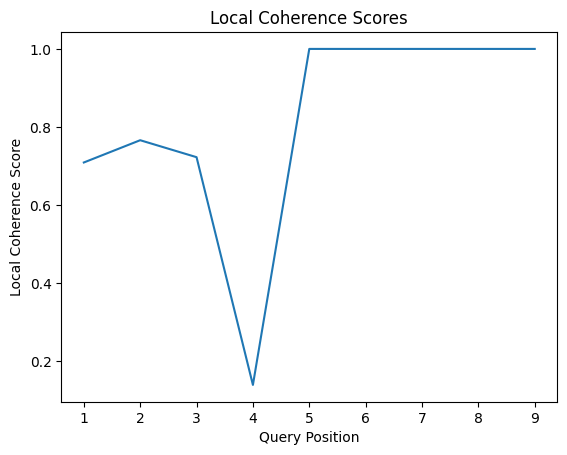

In [16]:

s1.plot_coherence_graph()

In [18]:
import numpy as np

arr = [[1,2,3],
       [4,5,6]]
w = [1,1]

np.dot(w, arr)

def weighted_sum(array, weighting_scheme):

    if weighting_scheme == "uniform":
        return np.sum(array)
    


array([5, 7, 9])

### Working with data


In [1]:
from models import EmbeddingModel
from session import QuerySession
import json


class DataProcessor:
    """
    Class to process data from json file

    Attributes:
        file_path: str

    Returns:
        None
    """

    def __init__(self, file_path: str = None) -> None:
        """
        Initializes the DataProcessor object

        Args:
            file_path: str

        Returns:
            None
        """
        self.file_path = file_path

    def _read_json_file(self) -> dict:
        """
        Reads the json file

        Args:
            None

        Returns:
            data: dict
        """
        with open(self.file_path, "r", encoding="utf8") as file:
            data = json.load(file)
        return data

    def export_sessions(
        self,
        decontextualized: bool = True,
        embedding_model: str = "all-mpnet-base-v2",
        context_window_size: int = 1,
        statistic: str = "mean",
        normalize_embeddings: bool = False,
    ) :
        data = self._read_json_file()
        # sessions = []
        query_field = "oracle_query" if decontextualized else "query"
        embedding_model = EmbeddingModel(model_name=embedding_model)
        for i, session in enumerate(data):
            queries = [query[query_field] for query in session["turns"]]
            session_obj = QuerySession(
                queries=queries,
                embedding_model=embedding_model,
                context_window_size=context_window_size,
                statistic=statistic,
                normalize_embeddings=normalize_embeddings,
            )
            # sessions.append(session_obj)
            # if i > 10:
            #     break
        # return sessions
            yield session_obj

In [2]:
data = DataProcessor("../data/dev_sessions.json")

In [17]:
sessions1 = data.export_sessions(embedding_model="all-mpnet-base-v2", context_window_size=1, statistic="mean", normalize_embeddings=False)
sessions3 = data.export_sessions(embedding_model="all-MiniLM-L6-v2", context_window_size=4, statistic="mean", normalize_embeddings=False)
sessions2 = data.export_sessions(embedding_model="nli-distilroberta-base-v2", context_window_size=1, statistic="mean", normalize_embeddings=False)
sessions4 = data.export_sessions(embedding_model="all-MiniLM-L6-v2", context_window_size=4, statistic="mean", normalize_embeddings=False)

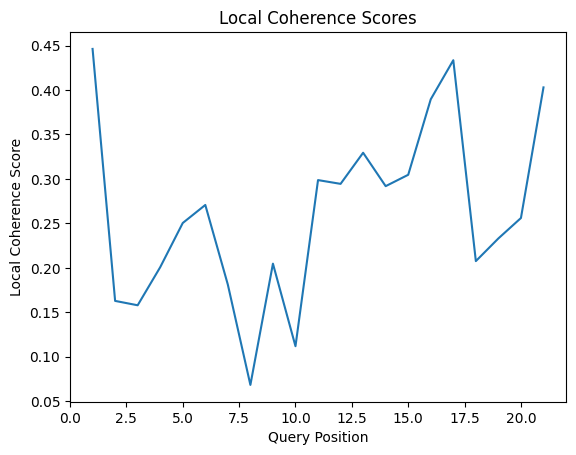

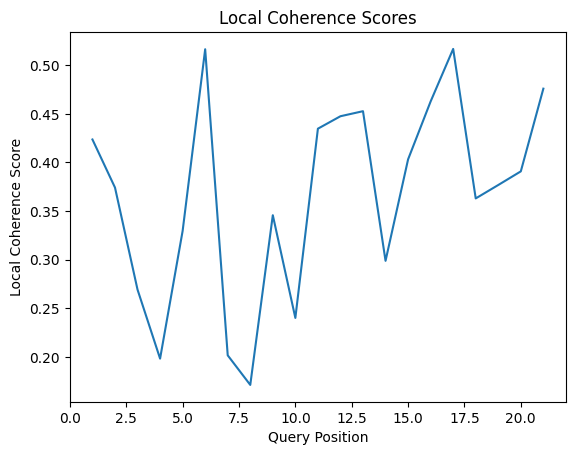

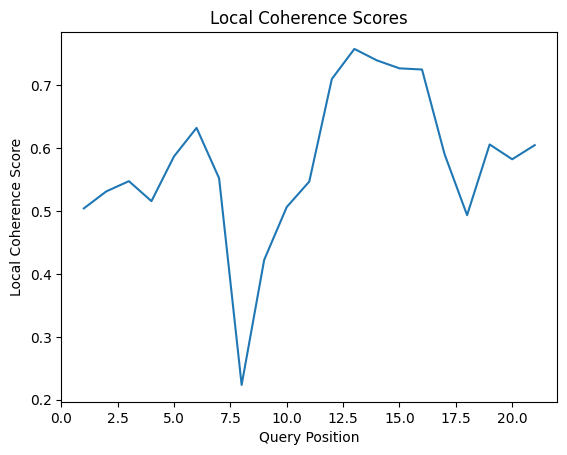

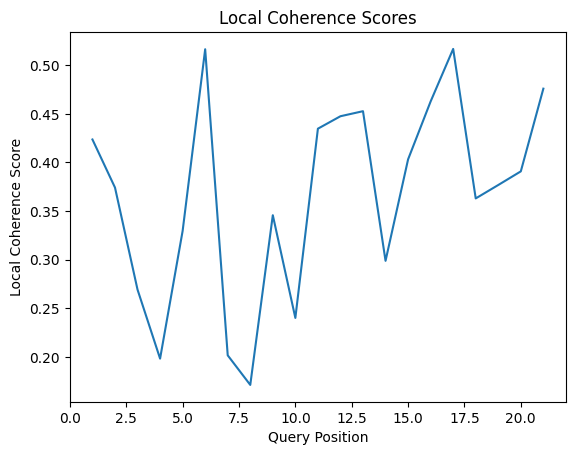

['What county is oklahoma city ok in?',
 'In which county is cincinnati oh located.',
 'Worcester ma is in what county.',
 'In what county is topeka ks.',
 'What county is berkeley ca?',
 'What county is east providence ri in?',
 'What county is palo alto ca in?',
 'Cleveland is in what county in ohio.',
 "What is corpus christi texas' population?",
 'What county is huntsville al in?',
 'Buffalo NY is what county.',
 'What county is boston ma in?',
 'What county is new orleans la located in?',
 'What county is cleveland tn in?',
 'What county is rockford in?',
 'What county is duluth mn in?',
 'What county is dayton oh located in?',
 'What county is fort wayne in?',
 'What is sarasota fl and what county?',
 'What county is oakland ca?',
 'What county is new braunfels tx in?',
 'What county is kansas city mo in?']

In [31]:
session1 = next(sessions1)
session1.plot_local_coherence()
session1.queries

session3 = next(sessions3)
session3.plot_local_coherence()
session3.queries

session2 = next(sessions2) 
session2.plot_local_coherence()
session2.queries

session4 = next(sessions4)
session4.plot_local_coherence()
session4.queries

In [9]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer("all-MiniLM-L6-v2")


# Sentences are encoded by calling model.encode()
emb1 = model.encode("What is vestigial structures definition?")
emb2 = model.encode("What are homologous structures and examples?")

cos_sim = util.cos_sim(emb1, emb2)
print("Cosine-Similarity:", cos_sim)

Cosine-Similarity: tensor([[0.4492]])


### Using AnglE

In [1]:

from data_processors import DataProcessor

data = DataProcessor("../data/dev_sessions.json")


In [2]:
sessions1 = data.export_sessions(embedding_model="all-mpnet-base-v2", context_window_size=1, normalize_embeddings=True, statistics="all")
sessions2 = data.export_sessions(embedding_model="mxbai-embed-large-v1", context_window_size=1, normalize_embeddings=True, statistics="all")

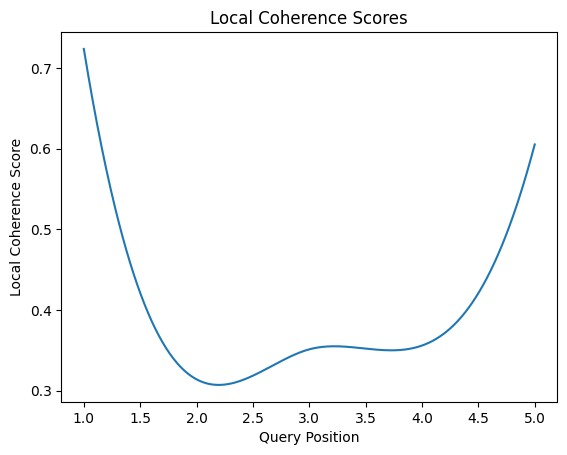

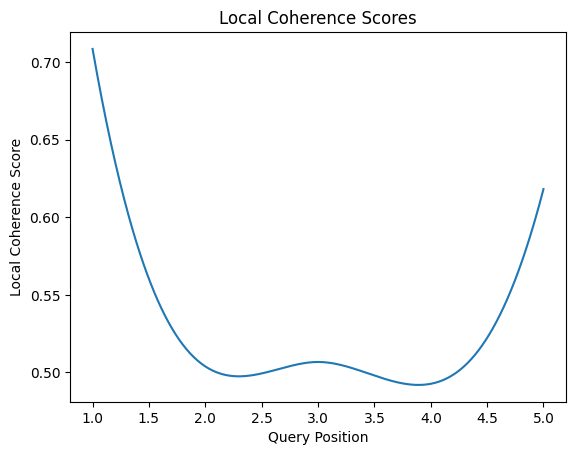

['What is a sensory neuron definition?',
 'What is a motor neuron definition?',
 'What is the function of the hypothalamus?',
 'How do you define the corpus callosum?',
 'What are the functions of the amygdala?',
 'How does the cerebral cortex function?']

In [3]:
session1 = next(sessions1)
session1.plot_local_coherence()
session1.queries

session2 = next(sessions2) 
session2.plot_local_coherence()
session2.queries

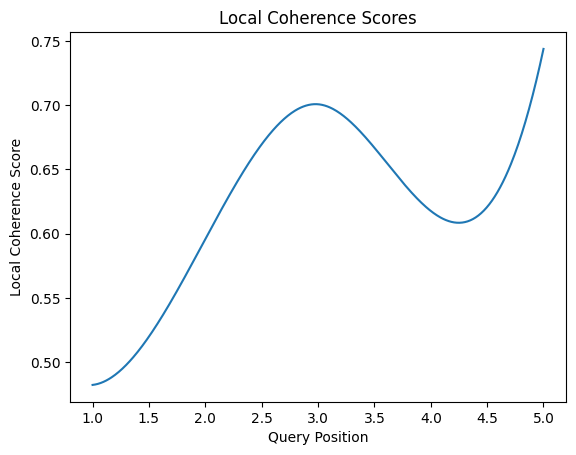

['Candida causes and symptoms?',
 'What is a gastritis?',
 'What are the causes and symptoms of an ulcer?',
 'What are the symptoms and causes of ibs?',
 'What are gastritis and gerd symptoms?',
 'What are the signs of acid reflux?']

In [22]:

session2 = next(sessions2) 
session2.plot_local_coherence()
session2.queries

In [15]:
type(session1.queries)

list

In [29]:
session1.global_coherence_score

0.48201725

In [27]:
session1.add_queries(session2.queries)

In [ ]:
session1.print_queries()

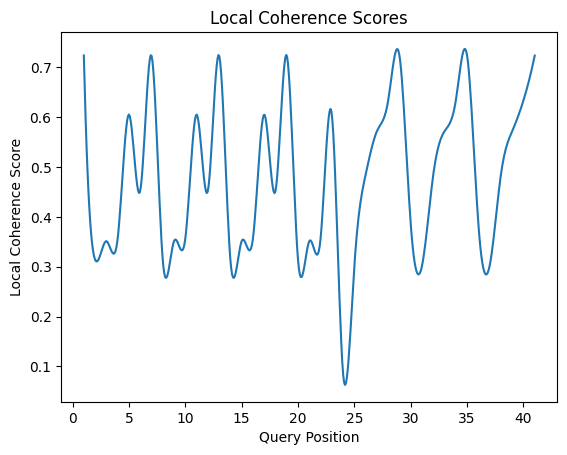

['What is a sensory neuron definition?',
 'What is a motor neuron definition?',
 'What is the function of the hypothalamus?',
 'How do you define the corpus callosum?',
 'What are the functions of the amygdala?',
 'How does the cerebral cortex function?',
 'What is a sensory neuron definition?',
 'What is a motor neuron definition?',
 'What is the function of the hypothalamus?',
 'How do you define the corpus callosum?',
 'What are the functions of the amygdala?',
 'How does the cerebral cortex function?',
 'What is a sensory neuron definition?',
 'What is a motor neuron definition?',
 'What is the function of the hypothalamus?',
 'How do you define the corpus callosum?',
 'What are the functions of the amygdala?',
 'How does the cerebral cortex function?',
 'What is a sensory neuron definition?',
 'What is a motor neuron definition?',
 'What is the function of the hypothalamus?',
 'How do you define the corpus callosum?',
 'What are the functions of the amygdala?',
 'How does the cere

In [28]:
session1.plot_local_coherence()
session1.queries

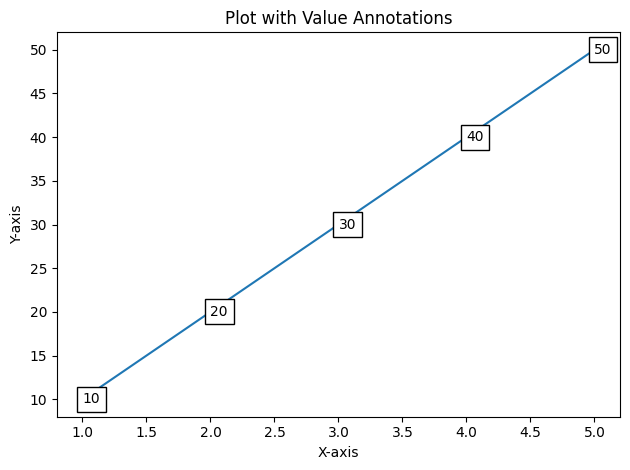

In [9]:


import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the data
ax.plot(x, y)

# Add text annotations to the plot
for i in range(len(x)):
    ax.text(x[i], y[i], str(y[i]), ha='left', va='center', bbox=dict(facecolor='white', edgecolor='black'))

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Plot with Value Annotations')

# Adjust the plot layout to make space for the text annotations
plt.tight_layout()

# Show the plot
plt.show()


In [15]:
import numpy as np
np.arange(1, 10)

min(list(range(1,10)))

1

In [48]:
from typing import Dict

import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer
from sentence_transformers.util import cos_sim

# For retrieval you need to pass this prompt. Please find our more in our blog post.
def transform_query(query: str) -> str:
    """ For retrieval, add the prompt for query (not for documents).
    """
    return f'Represent this sentence for searching relevant passages: {query}'

# The model works really well with cls pooling (default) but also with mean poolin.
def pooling(outputs: torch.Tensor, inputs: Dict,  strategy: str = 'cls') -> np.ndarray:
    if strategy == 'cls':
        outputs = outputs[:, 0]
    elif strategy == 'mean':
        outputs = torch.sum(
            outputs * inputs["attention_mask"][:, :, None], dim=1) / torch.sum(inputs["attention_mask"])
    else:
        raise NotImplementedError
    return outputs.detach().cpu().numpy()

# 1. load model

model_id = 'mixedbread-ai/mxbai-embed-large-v1'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id)

docs = ['Candida causes and symptoms?',
 'What is a gastritis?',
 'What are the causes and symptoms of an ulcer?',
 'What are the symptoms and causes of ibs?',
 'What are gastritis and gerd symptoms?',
 'What are the signs of acid reflux?'
]


sim = []

for i,doc in enumerate(docs):
    if i > 0:

        transform_query(doc)
        # 2. encode
        inputs = tokenizer([doc, docs[i-1]], padding=True, return_tensors='pt')
        for k, v in inputs.items():
            inputs[k] = v
        outputs = model(**inputs).last_hidden_state
        embeddings = pooling(outputs, inputs, 'cls')

        sim.append(cos_sim(embeddings[0], embeddings[1:])[0].item())



sim 


[0.48235082626342773,
 0.5957933068275452,
 0.7006740570068359,
 0.6176952123641968,
 0.7437141537666321]

In [7]:
session2.embeddings

array([[ 0.41356993,  1.0949869 , -0.9131135 , ...,  0.6355452 ,
        -0.31452334,  0.15984218],
       [ 0.4345789 ,  1.1249896 , -0.34300202, ...,  0.33348757,
        -0.7438271 , -0.03188054],
       [-0.17840853,  0.24294019, -0.5772953 , ..., -0.2918865 ,
        -0.48143676, -0.2786926 ],
       [-0.15574148,  0.4403015 , -0.1878676 , ..., -0.45343772,
        -0.64509195,  0.33801308],
       [-0.09626834, -0.0935178 , -0.47449785, ..., -0.13420948,
        -0.7827913 ,  0.3608314 ],
       [-0.23973003,  0.37058413, -0.1886471 , ..., -0.6177535 ,
        -0.7034221 ,  0.04977898]], dtype=float32)

In [8]:
session1.embeddings

array([[-0.10612246, -0.21226959,  0.03497711, ...,  0.0054201 ,
         0.04943923, -0.06031046],
       [-0.01541188, -0.05784241,  0.1074901 , ..., -0.0851981 ,
         0.02428957, -0.08508675],
       [ 0.08567058,  0.09835424,  0.11472219, ..., -0.13557592,
        -0.02348648, -0.09219082],
       [ 0.02770678, -0.23514462, -0.05863917, ..., -0.02845938,
        -0.01056989, -0.02060725],
       [ 0.11166015,  0.08378056, -0.00985992, ..., -0.16861595,
        -0.04978202, -0.10693832],
       [-0.0155258 ,  0.01045668,  0.00706727, ..., -0.21480595,
         0.03985314, -0.06306936]], dtype=float32)

In [16]:
import numpy as  np

np.linalg.norm(session2.embeddings[5])

17.947397

In [ ]:
from typing import Dict

import torch
import numpy as np
from transformers import AutoModel, AutoTokenizer
from sentence_transformers.util import cos_sim

# For retrieval you need to pass this prompt. Please find our more in our blog post.
def transform_query(query: str) -> str:
    """ For retrieval, add the prompt for query (not for documents).
    """
    return f'Represent this sentence for searching relevant passages: {query}'

# The model works really well with cls pooling (default) but also with mean poolin.
def pooling(outputs: torch.Tensor, inputs: Dict,  strategy: str = 'cls') -> np.ndarray:
    if strategy == 'cls':
        outputs = outputs[:, 0]
    elif strategy == 'mean':
        outputs = torch.sum(
            outputs * inputs["attention_mask"][:, :, None], dim=1) / torch.sum(inputs["attention_mask"])
    else:
        raise NotImplementedError
    return outputs.detach().cpu().numpy()

# 1. load model
model_id = 'mixedbread-ai/mxbai-embed-large-v1'
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id).cuda()


docs = [
    transform_query('A man is eating a piece of bread'),
    "A man is eating food.",
    "A man is eating pasta.",
    "The girl is carrying a baby.",
    "A man is riding a horse.",
]

# 2. encode
inputs = tokenizer(docs, padding=True, return_tensors='pt')
for k, v in inputs.items():
    inputs[k] = v.cuda()
outputs = model(**inputs).last_hidden_state
embeddings = pooling(outputs, inputs, 'cls')

similarities = cos_sim(embeddings[0], embeddings[1:])
print('similarities:', similarities)


In [15]:
z = 1+3j

if isinstance(z, complex):
    print("Complex number")

Complex number
